<a href="https://colab.research.google.com/github/luoChengwen/Tensorflow_test/blob/master/Exercise_8_sign_language_multiclass_classification%20(26_types).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
import pandas as pd
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

    # Your code starts here
    data = pd.read_csv(filename)
    labels = np.array(data.iloc[:,0])
    images = np.array(data.iloc[:,1:]).reshape(-1,28,28,1)
         
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(type(training_images), type(training_labels))
# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)
print('hello')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)
hello


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = .3,
                                   shear_range = .3,
                                   fill_mode = 'nearest'
    # Your Code Here
    )


validation_datagen = ImageDataGenerator(rescale = 1/255,
                                        width_shift_range = .3,
                                        shear_range = .3,
                                        fill_mode= 'nearest')
    # Your Code Here



    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
len(set(training_labels))
# but how come there are 26 signs??????

24

In [0]:
train_data_flow = train_datagen.flow(training_images, training_labels, batch_size=32)
validation_data_flow = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),input_shape=(28,28,1),activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(26,activation='softmax')
])


# Compile Model. 
model.compile(# Your Code Here
              optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc']

)

# Train the Model
history = model.fit_generator(    
    # Your Code Here
    train_data_flow,
    validation_data = validation_data_flow,
    epochs=20,
    steps_per_epoch=100,
    validation_steps=50                            
)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
#[6.92426086682151, 0.56609035]


Epoch 1/20
100/100 [==============================] - 4s 41ms/step - loss: 3.2243 - acc: 0.0437 - val_loss: 3.2364 - val_acc: 0.0275
Epoch 2/20
100/100 [==============================] - 2s 23ms/step - loss: 3.1782 - acc: 0.0538 - val_loss: 3.1716 - val_acc: 0.0662
Epoch 3/20
100/100 [==============================] - 2s 22ms/step - loss: 2.9867 - acc: 0.1000 - val_loss: 2.8671 - val_acc: 0.1006
Epoch 4/20
100/100 [==============================] - 2s 22ms/step - loss: 2.5738 - acc: 0.1963 - val_loss: 2.5177 - val_acc: 0.2025
Epoch 5/20
100/100 [==============================] - 2s 22ms/step - loss: 2.2688 - acc: 0.2775 - val_loss: 2.2829 - val_acc: 0.2894
Epoch 6/20
100/100 [==============================] - 2s 22ms/step - loss: 2.0071 - acc: 0.3509 - val_loss: 1.9181 - val_acc: 0.3494
Epoch 7/20
100/100 [==============================] - 2s 23ms/step - loss: 1.8184 - acc: 0.3963 - val_loss: 1.7141 - val_acc: 0.4581
Epoch 8/20
100/100 [==============================] - 2s 22ms/step - 

[148.86426656098587, 0.6522588]

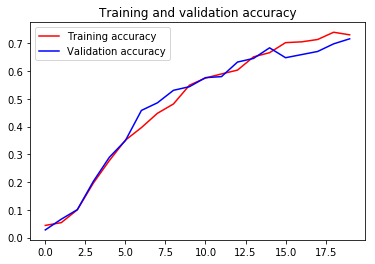

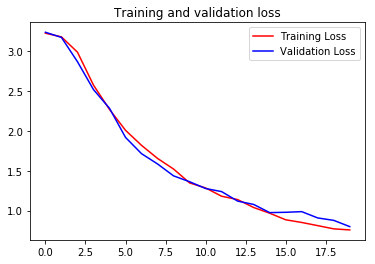

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']# Your Code Here
val_acc = history.history['val_acc']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()